In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_EDA = pd.read_csv("dataset_1.csv")

In [3]:
df_EDA.head(10)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
5,NaN,12,12,0,2,2,11
6,NaN,13,9,1,0,0,9
7,NaN,14,12,1,0,0,9
8,NaN,15,11,2,1,2,7
9,NaN,16,11,2,3,4,6


In [4]:
# removes white spaces in column names
df_EDA.columns = df_EDA.columns.str.strip()


In [5]:
#We use ffill because we use the previous value to fill the nulls 
df_EDA['Date'] = df_EDA['Date'].ffill()


In [6]:
df_EDA.dtypes

Date               object
Time (Local)        int64
Eyeballs            int64
Zeroes              int64
Completed Trips     int64
Requests            int64
Unique Drivers      int64
dtype: object

In [7]:
#We want to change Time(Local) into a time format
df_EDA['Time (Local)'] = pd.to_datetime(df_EDA['Time (Local)'], format='%H').dt.time


In [8]:
# Question 1: Which date had the most completed trips during the two-week period?
agg_df_EDA = df_EDA.groupby('Date').agg(Completed_Trips =('Completed Trips', 'sum'))
max_trips_row = agg_df_EDA[agg_df_EDA['Completed_Trips'] == agg_df_EDA['Completed_Trips'].max()]

date = max_trips_row.index[0]
print ('Date with the most completed trips:',date )

Date with the most completed trips: 22-Sep-12


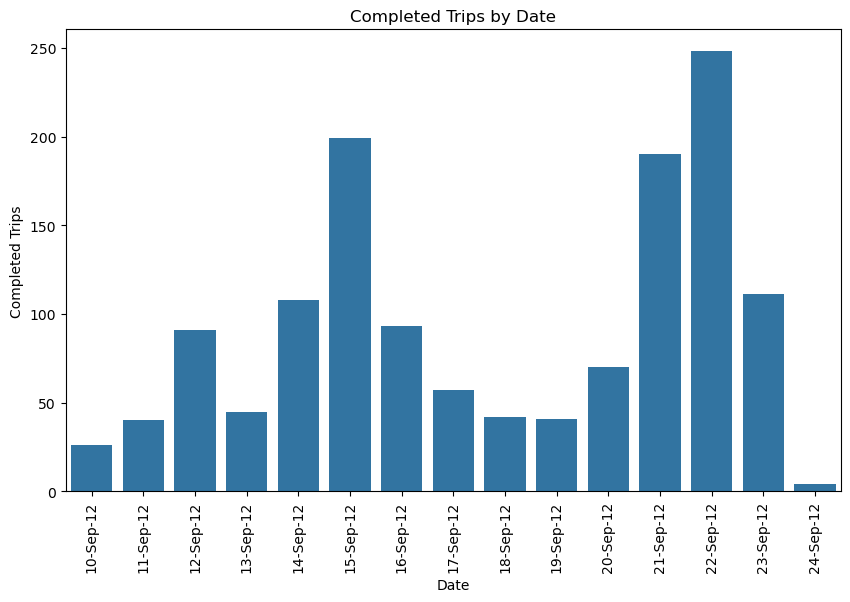

In [9]:
#Answering question 1 using visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Date', y='Completed_Trips', data=agg_df_EDA)
plt.xticks(rotation=90)
plt.title('Completed Trips by Date')
plt.xlabel('Date')
plt.ylabel('Completed Trips')
plt.show()

In [10]:
# Question 2: What was the highest number of completed trips within a 24-hour period?
  
df_EDA['Timestamp'] = pd.to_datetime(
    df_EDA['Date'].astype(str) + ' ' + df_EDA['Time (Local)'].astype(str),
    format='%d-%b-%y %H:%M:%S'  # Explicit format specification
)



In [11]:
df_EDA["Interval"] = df_EDA['Timestamp'].apply( lambda timestamp: pd.Interval(timestamp, timestamp + pd.Timedelta(hours=24), closed = 'left'))

In [12]:
# Sum "Completed Trips" where timestamps fall into each row's interval
df_EDA["Sum_Completed_Trips_In_Interval"] = df_EDA.apply(
    lambda row: df_EDA.loc[
        df_EDA["Timestamp"].between(
            row["Interval"].left,
            row["Interval"].right,
            inclusive="left"
        ),
        "Completed Trips"  # Column to sum
    ].sum(),
    axis=1
)

In [13]:
max_trips_timestamp = df_EDA[df_EDA['Sum_Completed_Trips_In_Interval'] == df_EDA['Sum_Completed_Trips_In_Interval'].max()]

interval_trips = max_trips_timestamp['Sum_Completed_Trips_In_Interval'].iloc[0]

interval_date = max_trips_timestamp['Interval'].iloc[0]

print ('The interval:' ,interval_date, 'has the most completed trips:',interval_trips )

The interval: [2012-09-21 17:00:00, 2012-09-22 17:00:00) has the most completed trips: 278


In [14]:
# Question 3: Which hour of the day had the most requests during the two-week period?
df_hour = df_EDA.groupby('Time (Local)').agg(Requests =('Requests', 'sum'))



In [15]:
df_hour

,Requests
Time (Local),
00:00:00,142
01:00:00,96
02:00:00,100
03:00:00,35
04:00:00,9
05:00:00,14
06:00:00,28
07:00:00,22
08:00:00,29


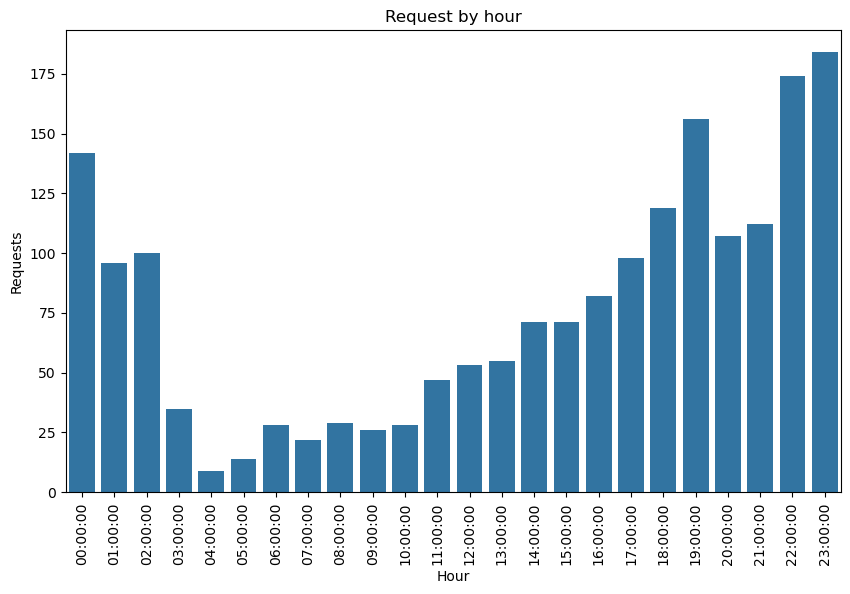

In [16]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Time (Local)', y ='Requests', data = df_hour)
plt.xticks(rotation=90)
plt.title('Request by hour')
plt.xlabel('Hour')
plt.ylabel('Requests')
plt.show()

In [17]:
# Question 4: What percentage of all zeroes during the two-week period occurred on the weekend (Friday at 5 pm to Sunday at 3 am)?
df_EDA['Day'] = pd.to_datetime(df_EDA['Date']).dt.dayofweek

df_EDA['Hour'] = df_EDA['Time (Local)'].astype(str)
df_EDA['Hour'] = pd.to_datetime(df_EDA['Hour']).dt.hour

weekend = df_EDA[(df_EDA['Day'] == 4) & (df_EDA['Hour'] >= 17) | (df_EDA['Day'] == 5) | (df_EDA['Day'] == 6) & (df_EDA['Hour'] <= 3)]
total_Zeroes = df_EDA['Zeroes'].sum()
weekend_Zeroes = weekend['Zeroes'].sum()
percentage = (weekend_Zeroes / total_Zeroes) * 100
weekday_Zeroes = total_Zeroes - weekend_Zeroes
print('The percentage of weekend zeroes:', percentage, '%')

The percentage of weekend zeroes: 45.066480055983206 %


C:\Users\darre\AppData\Local\Temp\ipykernel_49624\2598513332.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_EDA['Day'] = pd.to_datetime(df_EDA['Date']).dt.dayofweek
C:\Users\darre\AppData\Local\Temp\ipykernel_49624\2598513332.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_EDA['Hour'] = pd.to_datetime(df_EDA['Hour']).dt.hour


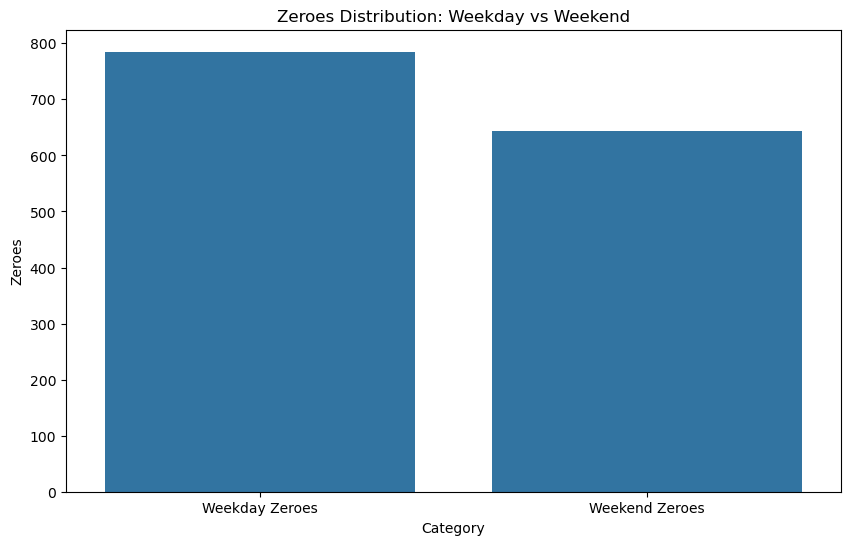

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x = ['Weekday Zeroes','Weekend Zeroes'], y = [weekday_Zeroes, weekend_Zeroes])
plt.title('Zeroes Distribution: Weekday vs Weekend')
plt.xlabel('Category')
plt.ylabel('Zeroes')
plt.show()

In [19]:
# Question 5: What is the weighted average ratio of completed trips per driver during the two-week period?
df_drivers = df_EDA[df_EDA['Unique Drivers'] >0] 
df_drivers['ratio'] = df_drivers['Completed Trips'] / df_drivers['Unique Drivers']
value = sum(df_drivers['Unique Drivers']*df_drivers['ratio'])
weight = sum(df_drivers['Unique Drivers'])
print("The Weighted average ratio of completed trips per driver:", value/weight)


The Weighted average ratio of completed trips per driver: 0.5141349415755748


C:\Users\darre\AppData\Local\Temp\ipykernel_49624\2314119927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drivers['ratio'] = df_drivers['Completed Trips'] / df_drivers['Unique Drivers']


In [20]:
# Question 6: In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests?
df_EDA["Interval"] = df_EDA['Timestamp'].apply( lambda timestamp: pd.Interval(timestamp, timestamp + pd.Timedelta(hours=8), closed = 'left'))

In [21]:
df_EDA["Sum_Requests_In_Interval"] = df_EDA.apply(
    lambda row: df_EDA.loc[
        df_EDA["Timestamp"].between(
            row["Interval"].left,
            row["Interval"].right,
            inclusive="left"
        ),
        "Requests"  # Column to sum
    ].sum(),
    axis=1
)

In [22]:
max_Requests_timestamp = df_EDA[df_EDA['Sum_Requests_In_Interval'] == df_EDA['Sum_Requests_In_Interval'].max()]


In [23]:
max_Requests_timestamp

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp,Interval,Sum_Completed_Trips_In_Interval,Day,Hour,Sum_Requests_In_Interval
274,21-Sep-12,17:00:00,68,25,26,26,20,2012-09-21 17:00:00,"[2012-09-21 17:00:00, 2012-09-22 01:00:00)",278,4,17,207
300,22-Sep-12,19:00:00,43,10,21,24,15,2012-09-22 19:00:00,"[2012-09-22 19:00:00, 2012-09-23 03:00:00)",189,5,19,207


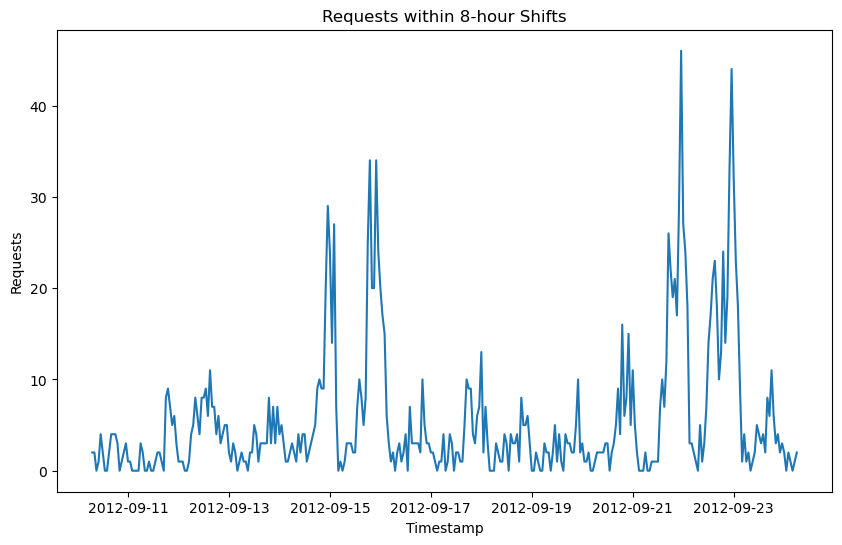

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = 'Timestamp', y = 'Requests', data = df_EDA)
plt.title('Requests within 8-hour Shifts')
plt.xlabel('Timestamp')
plt.ylabel('Requests')
plt.show()

In [25]:
# Question 7: True or False: Driver supply always increases when demand increases during the two-week period.
df_EDA['Change in Request'] = df_EDA['Requests'].diff()
df_EDA['Change in Driver'] = df_EDA['Unique Drivers'].diff()
df_EDA = df_EDA.fillna(value = 0, axis = 1)

In [26]:
#If request increase, change in driver has to increase
df_EDA['Marker'] = (df_EDA['Change in Request'] > 0) & (df_EDA['Change in Driver'] > 0)

In [27]:
Changes = df_EDA['Marker'].all()
print('Driver supply always increases when demand increases is' , Changes)

Driver supply always increases when demand increases is False


In [28]:
# Question 8: In which 72-hour period is the ratio of Zeroes to Eyeballs the highest?
df_EDA = df_EDA.set_index('Timestamp')
df_rolling_sum = df_EDA['Zeroes'].rolling('72h').sum()/df_EDA['Eyeballs'].rolling('72h').sum()
df_rolling_sum.head()

C:\Users\darre\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


Timestamp
2012-09-10 07:00:00    0.000000
2012-09-10 08:00:00    0.000000
2012-09-10 09:00:00    0.157895
2012-09-10 10:00:00    0.178571
2012-09-10 11:00:00    0.153846
dtype: float64

In [29]:
df_rolling_sum[df_rolling_sum == max(df_rolling_sum)]

Timestamp
2012-09-18 04:00:00    0.292977
dtype: float64

In [30]:
df_EDA = df_EDA.reset_index()

In [31]:
# Question 9: If you could add 5 drivers to any single hour of every day during the two-week period, which hour should you add them to?
highest_requests_hour = df_EDA.groupby('Time (Local)')['Requests'].sum().sort_values(ascending=False)

In [32]:
first = highest_requests_hour.head(1)
print('The best time to add 5 drivers is at', first.index[0],'with the most request at', first.iloc[0])

The best time to add 5 drivers is at 23:00:00 with the most request at 184


In [33]:
# Question 10: True or False: There is exactly two weeks of data in this analysis.
end = df_EDA['Timestamp'].max()
start = df_EDA['Timestamp'].min()

In [34]:
days = (end - start)
print('There is not excatly 14 days, as it is missing 1 hour showing:', days, 'hours')

There is not excatly 14 days, as it is missing 1 hour showing: 13 days 23:00:00 hours


In [35]:
# Question 11: Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e., when are supply and demand at both their natural minimums)
quiet_day = df_EDA.groupby('Time (Local)').agg(Total_Request=('Requests', 'sum'), Total_Drivers=('Unique Drivers', 'sum')).reset_index()

In [36]:
quiet_day['lowest'] = quiet_day['Total_Request'] + quiet_day['Total_Drivers']
smallest_row = quiet_day.sort_values(by= 'lowest', ascending=True).head(1)
print('The best time to consider as a quiet day or end day is at', smallest_row['Time (Local)'].iloc[0])

The best time to consider as a quiet day or end day is at 04:00:00


<Axes: >

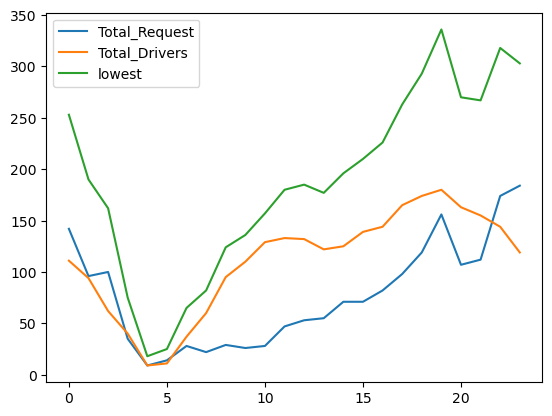

In [37]:
quiet_day.plot()